In [25]:
import os
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('Solarize_Light2')

In [26]:
TICKERS = [
    'EURUSD=X',
    'USDCHF=X',
    # 'GBPUSD=X'
]

def load_data():
    end_date = '2024-10-16'
    start_date = pd.to_datetime(end_date)-pd.DateOffset(360*2)

    if os.path.exists("data/ratio-data.csv"):
        _df = pd.read_csv("data/ratio-data.csv")
        _df['Datetime'] = pd.to_datetime(_df['Datetime'], utc=True)
        _df.set_index(['Datetime', 'Ticker'], inplace=True)
    else:
        _df = yf.download(
                tickers=TICKERS, 
                interval='1h', 
                # period="max", 
                start=start_date,
                end=end_date
            ).dropna().drop(columns=['Volume', 'Adj Close']).stack(future_stack=True)
        _df.to_csv("data/ratio-data.csv")

    _df.columns = _df.columns.str.lower()

    return _df

In [27]:
df = load_data()

df.head(len(TICKERS) * 3)

close      high       low      open
Datetime                  Ticker                                          
2022-10-26 23:00:00+00:00 EURUSD=X  1.009489  1.009591  1.008268  1.008268
                          USDCHF=X  0.984600  0.986200  0.984400  0.986080
2022-10-27 00:00:00+00:00 EURUSD=X  1.008065  1.009693  1.007760  1.008980
                          USDCHF=X  0.985500  0.985890  0.983600  0.984740
2022-10-27 01:00:00+00:00 EURUSD=X  1.007760  1.008675  1.007658  1.008166
                          USDCHF=X  0.985320  0.985640  0.984000  0.985550

- **Pct change**

In [28]:
pair_ratio = pd.DataFrame(
    {
        TICKERS[0]: df.xs(TICKERS[0], level=1)['close'],
        TICKERS[1]: df.xs(TICKERS[1], level=1)['close'],
    }
).dropna()

pair_ratio['ratio'] = pair_ratio[TICKERS[1]] / pair_ratio[TICKERS[0]]

pair_ratio.tail()

,EURUSD=X,USDCHF=X,ratio
Datetime,,,
2024-10-15 18:00:00+00:00,1.089087,0.86275,0.792177
2024-10-15 19:00:00+00:00,1.088969,0.86245,0.791988
2024-10-15 20:00:00+00:00,1.089443,0.86181,0.791055
2024-10-15 21:00:00+00:00,1.089562,0.86160,0.790777
2024-10-15 22:00:00+00:00,1.089206,0.86235,0.791724


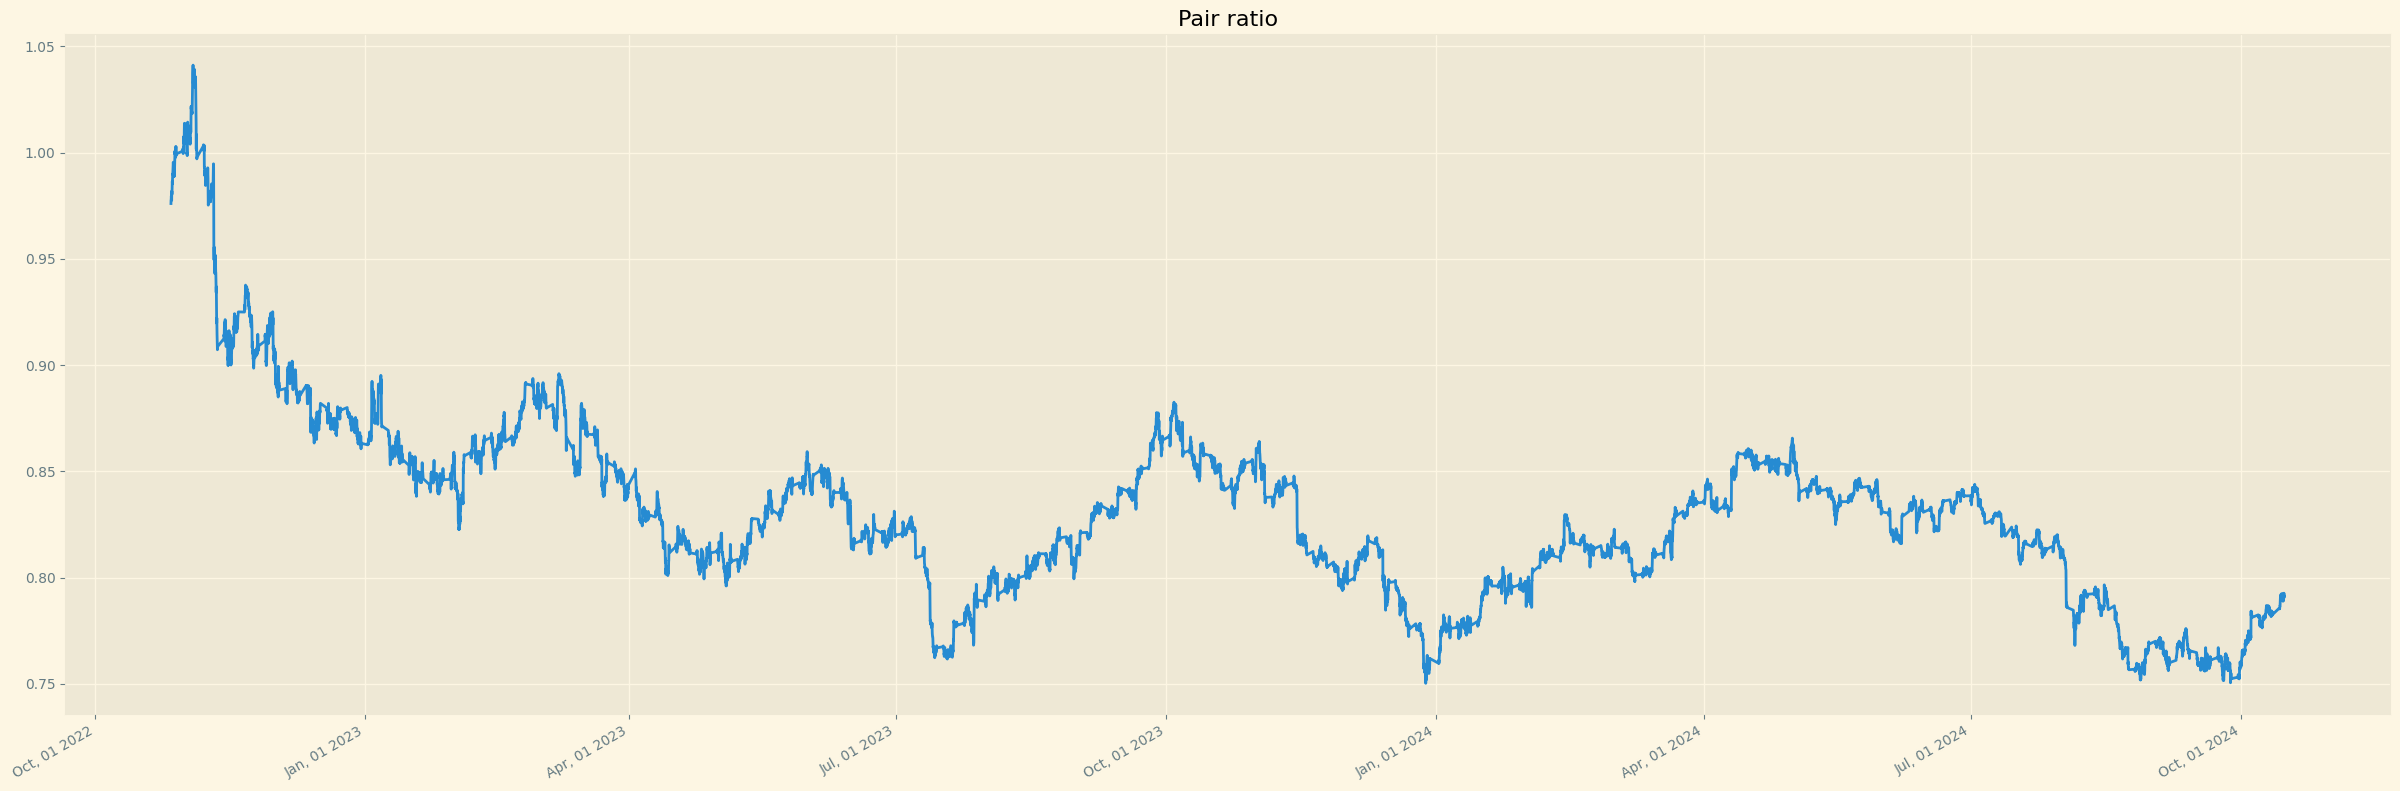

In [29]:
pair_ratio['ratio'].plot(figsize=(30, 10), xlabel='')

plt.title('Pair ratio')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter("%b, %d %Y"))